# Twitter Sentiment Analysis

---

## 1. Business Understanding

### 1.1 Overview

In the modern digital era, social media platforms like Twitter (now X) have become powerful channels for consumers to express opinions, experiences, and emotions about brands, products, and services. These views can significantly influence purchasing decisions, brand reputation, and marketing strategies.

Manually tracking and interpreting this vast, unstructured feedback is impractical for companies. As a result, organizations increasingly turn to **Natural Language Processing (NLP)** and **machine learning models** to automatically analyze and interpret tweet sentiments.

![NLP Diagram](nlp.image.png)
*Figure 1: Illustration of how Natural Language Processing (NLP) processes and classifies text to produce outputs.*

---

### 1.2 Business Problem

Businesses need to understand **how customers feel** about their products and brands in real time. However, the sheer volume and unstructured nature of tweets make manual analysis impossible.

The core challenge is to **automatically classify each tweet** as **positive**, **negative**, or **neutral**. This provides actionable insights to:

- Identify emerging trends in customer satisfaction or dissatisfaction.
- Track public reactions to product launches or campaigns.
- Inform data-driven marketing and customer engagement decisions.

---

### 1.3 Project Objective

**Main Objective:**  
To **develop an automated sentiment classification model** that accurately analyzes and categorizes sentiments expressed in posts on **X (formerly Twitter)** as **positive, negative, or neutral**, enabling real-time insights into customer perceptions of a brand to support **data-driven marketing** and **brand management decisions**.

**Specific Objectives:**  

1. **Build a Binary Classification Model:**  
   Develop and train a machine learning model to accurately distinguish between **positive** and **negative** sentiments in X posts.  

2. **Extend to Multiclass Classification:**  
   Enhance the model to classify posts into **four categories**:  
   - No emotion toward brand or product  
   - Positive emotion  
   - Negative emotion  
   - I can't tell  
   This should be done **while maintaining or improving overall classification performance**.

3. **Support Business Decision-Making:**  
   Deliver **interpretable sentiment insights** to marketing teams and brand managers to:  
   - Optimize campaigns  
   - Address customer concerns  
   - Enhance brand reputation  

---

### 1.4 Business Value

An accurate sentiment analysis system delivers substantial value to decision-makers by enabling:

- **Brand Monitoring**: Track customer feelings about the brand over time.  
- **Marketing Optimization**: Pinpoint campaigns that drive positive engagement or negative feedback.  
- **Customer Insights**: Uncover pain points or drivers of satisfaction.  
- **Faster Decision-Making**: Provide near real-time feedback analysis.  

---

### 1.5 Research Questions

1. **How do customers feel about the company’s products or services**, based on sentiments expressed on Twitter?  
2. **What key factors or topics drive positive and negative sentiments** toward the brand on Twitter?  
3. **How can Twitter sentiment insights support business decisions**, such as marketing strategies, customer engagement, and brand reputation management?

---

### 1.6 Success Criteria

The project's success will be measured by:

1. **Actionable Insights**: The system delivers meaningful customer opinion trends on Twitter, supporting data-driven decisions.  
2. **Brand Reputation Tracking**: Enables real-time monitoring of public sentiment, allowing timely responses to issues.  
3. **Marketing and Engagement Impact**: Insights i

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', module='pandas')

/home/khalid-abdulkadir/anaconda3/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
[nltk_data] Downloading package stopwords to /home/khalid-
[nltk_data]     abdulkadir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/khalid-
[nltk_data]     abdulkadir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/khalid-
[nltk_data]     abdulka

In [2]:
data = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='latin1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# 📊 DATA UNDERSTANDING

## 1. Data Collection
- **Dataset Name:** judge-1377884607_tweet_product_company.csv  
- **Source:** Twitter Sentiment Dataset (Data World)  
- **Context:** Tweets labeled with emotions directed at brands or products.

## 2. Data Description
- **Number of Instances:** 9,093  
- **Number of Features:** 3  
  1. `tweet_text` – the content of the tweet  
  2. `emotion_in_tweet_is_directed_at` – brand/product the emotion is directed at  
  3. `is_there_an_emotion_directed_at_a_brand_or_product` – emotion label toward brand/product  

## 3. Data Quality
- **Encoding:** latin1  
- **Duplicates:** 22  
- **Missing Values:** Some possible in `emotion_in_tweet_is_directed_at`  
- **Class Distribution (Target Variable):**
  - No emotion toward brand or product → 5389  
  - Positive emotion → 2978  
  - Negative emotion → 570  
  - I can't tell → 156  

## 4. Initial Observations
- Dataset is **imbalanced**, dominated by neutral tweets.  
- Text data requires **preprocessing** (cleaning, tokenization, stopword removal).  
- Will need **encoding** for categorical features and **balancing** before modeling.  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
data.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [ ]:
data.isnull().sum()

In [6]:
data.emotion_in_tweet_is_directed_at.value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [7]:
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [8]:
data.duplicated().sum()

22

In [9]:
data.emotion_in_tweet_is_directed_at.value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

# 🧹DATA PREPARATION

## 1. Data Cleaning
- **Filtered Data:** Kept only tweets with clear emotions (‘Positive emotion’, ‘Negative emotion’)
- **Dropped Column:** `emotion_in_tweet_is_directed_at`
- **Duplicates:** Removed previously (22 duplicates)
- **Resulting Data Shape:** (number of records after filtering)

## 2. Text Preprocessing
Applied NLTK-based cleaning function:
- Converted text to lowercase  
- Removed URLs, mentions, hashtags, numbers, and punctuation  
- Tokenized text and removed stopwords  
- Lemmatized words using WordNetLemmatizer  
- Created new column: `clean_text`

## 3. Label Encoding
Mapped sentiment labels:
- Positive emotion → 1  
- Negative emotion → 0  
Created new column: `label`

## 4. Data Splitting
- Split data into **Train (80%)** and **Test (20%)** sets  
- Used `stratify=y` to preserve class balance  

## 5. Feature Engineering (Text to Numeric)
- Used **TF-IDF Vectorizer** with:
  - `max_features=5000`
  - `ngram_range=(1,2)`  
- Transformed text data into numeric feature matrix for model input.

## 6. Handling Class Imbalance
- Applied **SMOTE (Synthetic Minority Oversampling Technique)** on training data  
- Balanced positive and negative samples for fair model training.

---

*Output:* Cleaned, vectorized, and balanced dataset ready for the **Modeling Phase**.


In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100

# Filter columns with more than 50% missing values
missing_greater_than_50 = missing_percentage[missing_percentage > 50]

# Display them
missing_greater_than_50

emotion_in_tweet_is_directed_at    63.807324
dtype: float64

In [11]:
data = data.drop(columns=['emotion_in_tweet_is_directed_at'])

In [12]:
data.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [13]:
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [14]:
data.isnull().sum()

tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [15]:
data = data.dropna(subset=['tweet_text'])

In [16]:
data.isnull().sum()

tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [17]:
data = data.drop_duplicates()

In [18]:
data.isnull().sum()
data.duplicated().sum()

0

In [19]:
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [20]:
data.columns

Index(['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product'], dtype='object')

In [21]:
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [22]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#', '', text)
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        tokens = [t for t in tokens if t not in self.stop_words or t in {'not','no','never'}]
        tokens = [self.lemmatizer.lemmatize(t) for t in tokens]
        return ' '.join(tokens)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.clean_text)

In [23]:
# Binary target
data['binary_target'] = data['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 1,
    'Negative emotion': 0
})

# Multiclass target (example mapping)
data['multiclass_target'] = data['is_there_an_emotion_directed_at_a_brand_or_product'].map({
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral',
    'I can’t tell': 'uncertain'
})

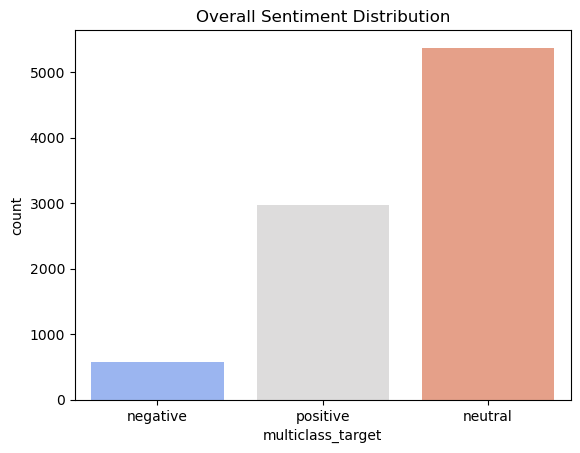

In [24]:
sns.countplot(x='multiclass_target', data=data, palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.show()

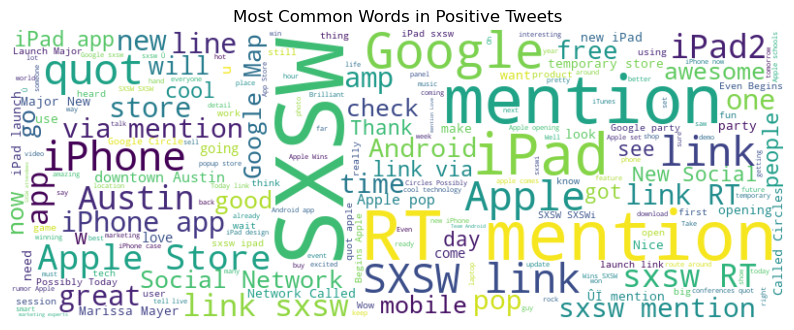

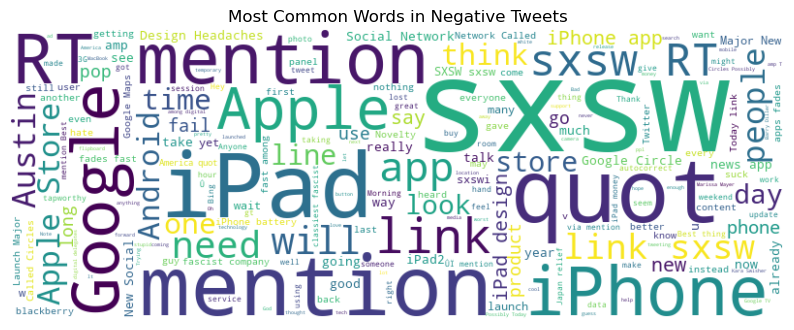

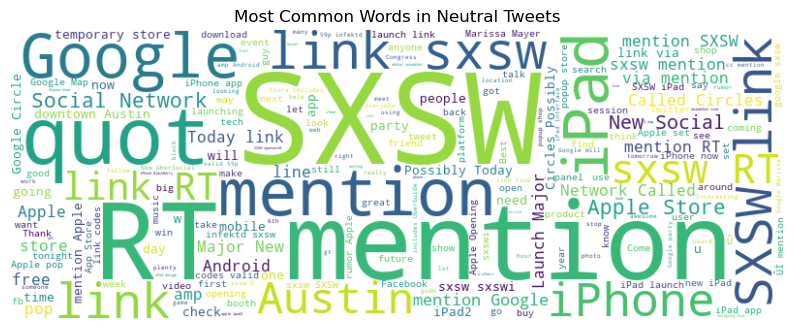

In [25]:
#Generate word clouds for each sentiment
sentiments = ['positive', 'negative', 'neutral']

for sentiment in sentiments:
    text = " ".join(data[data['multiclass_target'] == sentiment]['tweet_text'].astype(str))
    
    wordcloud = WordCloud(
        width=800, 
        height=300, 
        background_color='white',
        colormap='viridis'
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Common Words in {sentiment.capitalize()} Tweets")
    plt.show()

In [26]:
data.multiclass_target.value_counts()

multiclass_target
neutral     5375
positive    2970
negative     569
Name: count, dtype: int64

In [27]:
#Keeping only rows that have binary labels
bin_data = data[data['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]

# Droping any possible NaNs
bin_data = bin_data.dropna(subset=['binary_target'])

# target and feature
X = bin_data['tweet_text']
y = bin_data['binary_target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [28]:
# Droping Nans
multi_data = data.dropna(subset=['multiclass_target'])

#Features and target
X_multi = multi_data['tweet_text']
y_multi = multi_data['multiclass_target']

# Train test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, stratify=y_multi, random_state=42
)

In [29]:
base_pipeline = ImbPipeline([
    ('cleaner', TextCleaner()),  
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1,2))),  
    # ('smote', SMOTE(random_state=42)),  
    ('model', LogisticRegression(max_iter=1000, random_state=42 ))  # placeholder model
])

In [30]:
 # Base Pipeline for multi class
base_pipeline_multi = ImbPipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'))
])

In [31]:
# Encode target labels for XGBOOST
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_multi)
y_test_enc = le.transform(y_test_multi)

# Define the XGBoost pipeline
pipeline_xgb_multi = ImbPipeline([
    ('cleaner', TextCleaner()), 
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective='multi:softmax',
        num_class=3,
        eval_metric='mlogloss'
    ))
])

## Modeling

### Binary Classifier

In [32]:
# training a Logistic Regression
pipeline_lr = base_pipeline.set_params(model=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', ))
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

In [33]:
# training a Random Forest
pipeline_rf = base_pipeline.set_params(model=RandomForestClassifier(n_estimators=200, random_state=42,class_weight='balanced'))
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

In [34]:
# training a XGBoost
pipeline_xgb = base_pipeline.set_params(model=XGBClassifier(eval_metric='logloss', random_state=42))
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

# Multi Class Classifier

In [35]:
# Logistic Regression
pipeline_lr_multi = base_pipeline_multi.set_params(
    model=LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', class_weight='balanced')
)
pipeline_lr_multi.fit(X_train_multi, y_train_multi)
y_pred_lr_multi = pipeline_lr_multi.predict(y_test_multi)

In [36]:
# Random Forest
pipeline_rf_multi = base_pipeline_multi.set_params(
    model=RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
)
pipeline_rf_multi.fit(X_train_multi, y_train_multi)
y_pred_rf_multi = pipeline_rf_multi.predict(y_test_multi)

In [37]:
# Training the model
pipeline_xgb_multi.fit(X_train_multi, y_train_enc)
y_pred_xgb_enc = pipeline_xgb_multi.predict(X_test_multi)
# Decode numeric predictions back to string labels
y_pred_xgb_multi = le.inverse_transform(y_pred_xgb_enc)


 Results for Logistic Regression
 Accuracy: 0.8630
              precision    recall  f1-score   support

    Negative       0.56      0.68      0.61       114
    Positive       0.94      0.90      0.92       594

    accuracy                           0.86       708
   macro avg       0.75      0.79      0.77       708
weighted avg       0.88      0.86      0.87       708



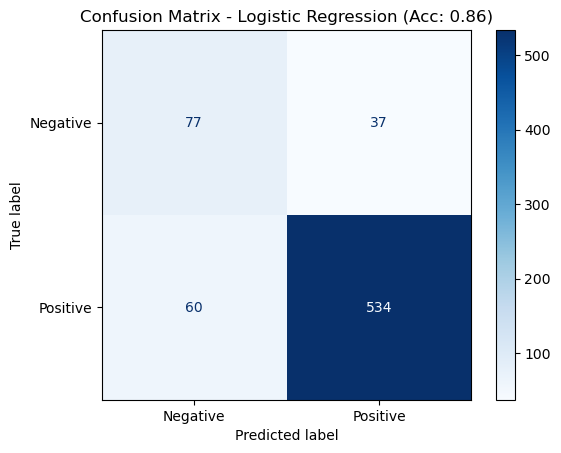


 Results for Random Forest
 Accuracy: 0.8686
              precision    recall  f1-score   support

    Negative       0.78      0.25      0.38       114
    Positive       0.87      0.99      0.93       594

    accuracy                           0.87       708
   macro avg       0.83      0.62      0.66       708
weighted avg       0.86      0.87      0.84       708



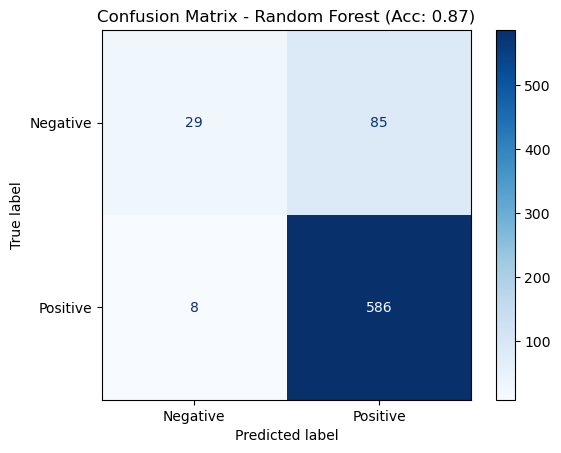


 Results for XGBoost
 Accuracy: 0.8531
              precision    recall  f1-score   support

    Negative       0.60      0.27      0.37       114
    Positive       0.87      0.96      0.92       594

    accuracy                           0.85       708
   macro avg       0.73      0.62      0.65       708
weighted avg       0.83      0.85      0.83       708



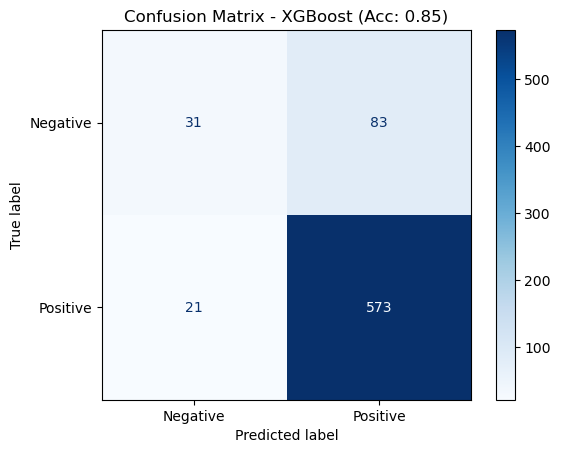

In [38]:
# Binary Evaluations
def evaluate_model(name, y_test, y_pred):
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n Results for {name}")
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name} (Acc: {acc:.2f})")
    plt.grid(False)
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


 Results for Logistic Regression (Multiclass)
 Accuracy: 0.9361
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       114
     neutral       0.90      1.00      0.95      1075
    positive       1.00      1.00      1.00       594

    accuracy                           0.94      1783
   macro avg       0.63      0.67      0.65      1783
weighted avg       0.88      0.94      0.91      1783



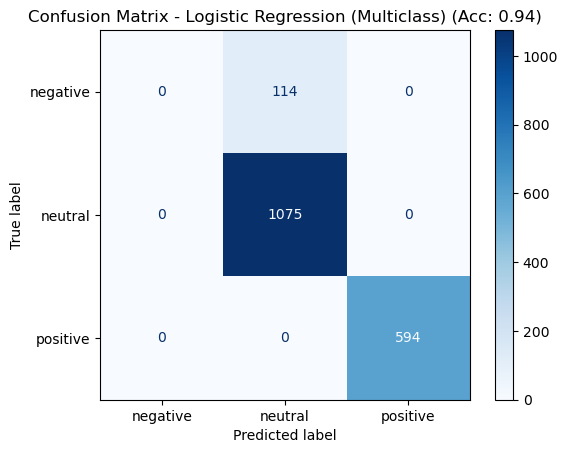


 Results for Random Forest (Multiclass)
 Accuracy: 0.6029
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       114
     neutral       0.60      1.00      0.75      1075
    positive       0.00      0.00      0.00       594

    accuracy                           0.60      1783
   macro avg       0.20      0.33      0.25      1783
weighted avg       0.36      0.60      0.45      1783



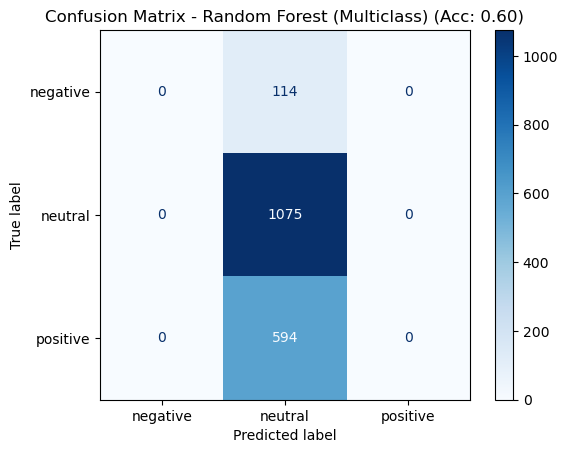

In [39]:
# Multi Class Evaluation Function
def evaluate_model(name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f"\n Results for {name}")
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name} (Acc: {acc:.2f})")
    plt.grid(False)
    plt.show()

# Evaluating both models for multi class
evaluate_model("Logistic Regression (Multiclass)", y_test_multi, y_pred_lr_multi)
evaluate_model("Random Forest (Multiclass)", y_test_multi, y_pred_rf_multi)


 Results for XGBoost (Multiclass)
Accuracy: 0.6713
              precision    recall  f1-score   support

    negative       0.45      0.26      0.33       114
     neutral       0.70      0.84      0.76      1075
    positive       0.62      0.44      0.52       594

    accuracy                           0.67      1783
   macro avg       0.59      0.52      0.54      1783
weighted avg       0.66      0.67      0.65      1783



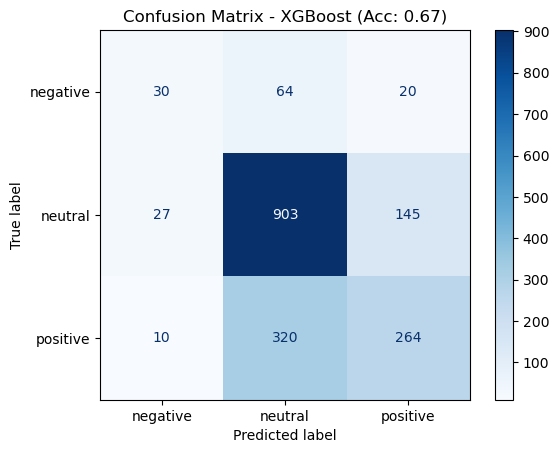

In [40]:
# Evaluatioions of XGBOOST
acc = accuracy_score(y_test_multi, y_pred_xgb_multi)
print(f"\n Results for XGBoost (Multiclass)")
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test_multi, y_pred_xgb_multi))

cm = confusion_matrix(y_test_multi, y_pred_xgb_multi, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix - XGBoost (Acc: {acc:.2f})")
plt.grid(False)
plt.show()

## 🧩 Conclusions

1. **Overall Sentiment:**  
   Analysis of the Twitter data shows that the majority of tweets are **neutral**, followed by **positive** and then **negative** sentiments.  
   This indicates that most users discuss the company’s products and services in an informative or neutral way rather than expressing strong emotions.  

2. **Customer Perception:**  
   The word cloud for positive tweets highlights common terms such as **“SXSW”**, **“Google”**, **“Apple”**, **“iPad”**, and **“iPhone.”**  
   These frequent mentions suggest that customers express excitement and satisfaction around **product launches**, **technology events**, and **brand innovations** — reflecting a generally favorable perception of the company’s offerings.  

3. **Model Performance:**  
   The **Logistic Regression model** achieved an **accuracy of 86%**, showing strong performance in classifying tweet sentiments.  
   The confusion matrix indicates that the model identifies **positive tweets** more accurately than **negative ones**, meaning it could still improve in detecting subtle negative tones or mixed emotions.


## 💡 Recommendations

1. **Strengthen Positive Engagement:**  
   Since positive sentiments are strongly linked to specific events and products, the company should continue leveraging **major tech events** (like SXSW) and **new product launches** to maintain excitement and engagement among users.

2. **Investigate Negative Sentiments:**  
   Although negative tweets are fewer, they provide valuable feedback.  
   The company should perform **deeper analysis** (e.g., topic modeling or keyword extraction) on these tweets to identify recurring issues such as product dissatisfaction or service complaints and address them promptly.

3. **Enhance the Sentiment Model:**  
   - Experiment with more advanced models such as **Random Forest**, **XGBoost**, or **BERT-based classifiers** to capture context and sarcasm better.  
   - Include more **balanced training data** to improve detection of underrepresented sentiments (especially negative).  
   - Fine-tune text preprocessing to handle **slang, emojis, and hashtags**, which often carry emotional cues.

4. **Continuous Monitoring:**  
   Set up a **real-time sentiment monitoring system** to track changes in public perception over time.  
   This will help evaluate how new products, marketing campaigns, or company decisions affect customer attitudes.


In [41]:
import joblib

# Save the trained model
joblib.dump(pipeline_lr, 'sentiment_analysis.pkl')

['sentiment_analysis.pkl']